In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import random
from scipy.stats import spearmanr

In [3]:
alpha_screen = pd.read_csv("../../data/salmon_data/alpha_mae_df_tapeworm1.csv", index_col=0)
mae_df = pd.read_csv("../../data/salmon_data/results_ave_mae_tapeworm1.csv", index_col=0)
salmon_GO = pd.read_csv("../../data/salmon_data/salmon_GO_annotations.tsv", sep='\t')
salmon_GO

,SYMBOL,ENTREZID,GENENAME,GO,ONTOLOGY,GO.term
0,1433b,100196586.0,14-3-3 protein beta/alpha,NaN,NaN,NaN
1,143b2,100195171.0,14-3-3 protein beta/alpha-2,GO:0004497,MF,"Term = \monooxygenase activity\"""""
2,143g1,100380373.0,14-3-3 protein gamma-1,NaN,NaN,NaN
3,143g2,100194987.0,14-3-3 protein gamma-2,NaN,NaN,NaN
4,2a5e,100195340.0,Serine/threonine-protein phosphatase 2A 56 kDa...,GO:0000159,CC,"Term = \protein phosphatase type 2A complex\"""""
...,...,...,...,...,...,...
96336,zufsp,100380430.0,zinc finger containing ubiquitin peptidase 1,NaN,NaN,NaN
96337,zwilch,106584830.0,zwilch kinetochore protein,NaN,NaN,NaN
96338,zyg11,106613955.0,"zyg-11 family member, cell cycle regulator",NaN,NaN,NaN
96339,zzef1,106567411.0,"zinc finger, ZZ-type with EF hand domain 1",GO:0005509,MF,"Term = \calcium ion binding\"""""


Text(0, 0.5, 'MAE')

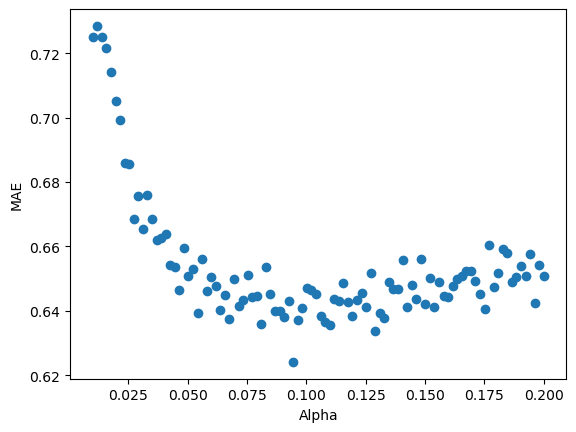

In [4]:
plt.scatter(x=alpha_screen.alphas, y= alpha_screen.mae_list)
plt.xlabel("Alpha")
plt.ylabel("MAE")

In [5]:
error_low = []
error_high = []
min_mae = np.inf
best_alpha = None
best_alpha_stdev = None
for index, row in alpha_screen.iterrows():
    cv =  ast.literal_eval(row["all_maes"])
    error_low.append(np.percentile(cv, 5))
    error_high.append(np.percentile(cv, 95))
    mean_mae = row["mae_list"]
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_alpha = row["alphas"]
        best_alpha_stdev = np.std(cv)


In [6]:
best_alpha

0.0944444444444444

In [7]:
best_alpha_stdev

0.03606620656991947

In [8]:
min_mae

0.6241390529749159

In [9]:
best_alpha_plus_std = min_mae + best_alpha_stdev
best_alpha_plus_std

0.6602052595448353

In [10]:
chosen_alpha_df = alpha_screen[alpha_screen["mae_list"] < best_alpha_plus_std]
chosen_alpha_df = chosen_alpha_df[chosen_alpha_df["alphas"] > best_alpha]
chosen_alpha_df.sort_values(by="mae_list", inplace=True)
chosen_alpha = chosen_alpha_df["alphas"].iloc[0]
chosen_alpha

0.128989898989899

In [11]:
light_green = (0.0, 0.6, 0.5)
pink = (1, 0.078, 0.576)

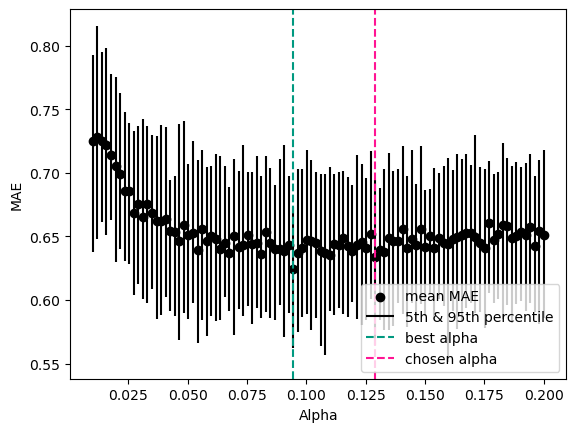

In [12]:
plt.scatter(x=alpha_screen.alphas, 
            y= alpha_screen.mae_list,
            c='k',
            label="mean MAE")
plt.vlines(alpha_screen.alphas, 
           error_low, 
           error_high,
           colors='k',
           label = "5th & 95th percentile")
plt.axvline(x=best_alpha, color=light_green, linestyle='--', label = "best alpha")
plt.axvline(x=chosen_alpha, color=pink, linestyle='--', label = "chosen alpha")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.legend(loc="lower right")

In [13]:
# Rename for plotting
mae_df["Gene"] = mae_df["Gene"].astype(str).str.replace('_', ' ')

In [14]:
mae_df.sort_values(by="ave_MAE", inplace=True)
mae_df.reset_index(drop=True, inplace=True)
idx_first_random = mae_df[mae_df["Gene"].str.contains("Random")].index[0]
idx_first_random
# top_random = mae_df.head(1)
# top_random = top_random["Gene"].values[0]
# top_random
#mae_df

38

           Gene   ave_MAE
0  LOC106613965  0.644905
1  LOC106576775  0.645641
2  LOC106604261  0.648876
3  LOC106585868  0.656541
4         gadl1  0.657915


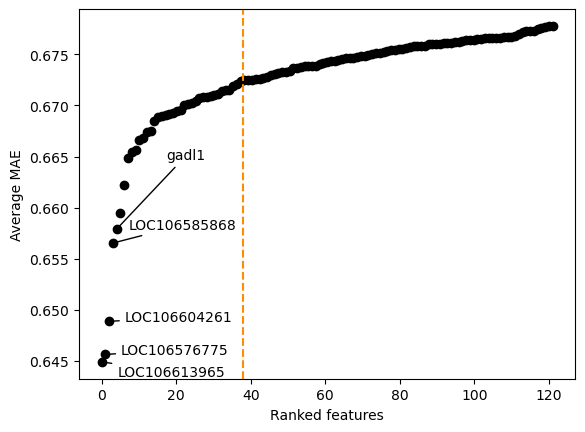

In [15]:
mae_df.sort_values(by="ave_MAE", inplace=True)

print(mae_df.head())

mae_list = list(mae_df["ave_MAE"])
feature_list = list(mae_df["Gene"])
x = np.linspace(0, len(mae_df), len(mae_df))
y = mae_list

plt.scatter(x, y, c='k')
plt.annotate(feature_list[0], (x[0], y[0]), textcoords="offset points", xytext=(50,-10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[1], (x[1], y[1]), textcoords="offset points", xytext=(50,0), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[2], (x[2], y[2]), textcoords="offset points", xytext=(50,0), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[3], (x[3], y[3]), textcoords="offset points", xytext=(50,10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[4], (x[4], y[4]), textcoords="offset points", xytext=(50,50), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.axvline(x=idx_first_random, ls="--", c = "darkorange")

plt.ylabel("Average MAE")
plt.xlabel("Ranked features")
plt.show()

In [16]:
mae_df.sort_values(by="Gene")["Gene"].values

array(['LOC100136466', 'LOC100380664', 'LOC106560239', 'LOC106563252',
       'LOC106563758', 'LOC106564730', 'LOC106566298', 'LOC106567787',
       'LOC106568681', 'LOC106569843', 'LOC106570128', 'LOC106570190',
       'LOC106571081', 'LOC106574134', 'LOC106574856', 'LOC106576106',
       'LOC106576710', 'LOC106576775', 'LOC106577499', 'LOC106577505',
       'LOC106578631', 'LOC106578982', 'LOC106579525', 'LOC106580299',
       'LOC106580503', 'LOC106581127', 'LOC106582964', 'LOC106584698',
       'LOC106585868', 'LOC106586541', 'LOC106587486', 'LOC106587655',
       'LOC106588400', 'LOC106589096', 'LOC106589565', 'LOC106590792',
       'LOC106591811', 'LOC106591921', 'LOC106591957', 'LOC106592479',
       'LOC106592508', 'LOC106592633', 'LOC106592935', 'LOC106592985',
       'LOC106593568', 'LOC106594765', 'LOC106595406', 'LOC106595868',
       'LOC106597196', 'LOC106598590', 'LOC106599773', 'LOC106600318',
       'LOC106601958', 'LOC106602055', 'LOC106602539', 'LOC106602581',
      

In [32]:
pd.set_option('display.max_rows', None)
mae_df.sort_values(by="ave_MAE")

,Gene,ave_MAE
0,LOC106613965,0.644905
1,LOC106576775,0.645641
2,LOC106604261,0.648876
3,LOC106585868,0.656541
4,gadl1,0.657915
5,LOC106563252,0.659445
6,LOC106592935,0.662191
7,LOC106570128,0.664834
8,rpl9,0.665480
9,LOC106570190,0.665684


In [29]:
mae_df.sort_values(by="Gene").values

array([['LOC100136466', 0.6695036824312717],
       ['LOC100380664', 0.6751403141243865],
       ['LOC106560239', 0.6715372880197159],
       ['LOC106563252', 0.6594446980820475],
       ['LOC106563758', 0.6695677659638589],
       ['LOC106564730', 0.6766779953308216],
       ['LOC106566298', 0.6747654144905207],
       ['LOC106567787', 0.6755447264545037],
       ['LOC106568681', 0.6769783439908955],
       ['LOC106569843', 0.6756450883575067],
       ['LOC106570128', 0.6648343043632149],
       ['LOC106570190', 0.6656839013088415],
       ['LOC106571081', 0.6714116276676149],
       ['LOC106574134', 0.6738898286093612],
       ['LOC106574856', 0.6772979063667558],
       ['LOC106576106', 0.6725775964280611],
       ['LOC106576710', 0.6736728772491463],
       ['LOC106576775', 0.6456412475631949],
       ['LOC106577499', 0.6729652211241267],
       ['LOC106577505', 0.6685279473982257],
       ['LOC106578631', 0.6737000422833371],
       ['LOC106578982', 0.6720760745718494],
       ['L

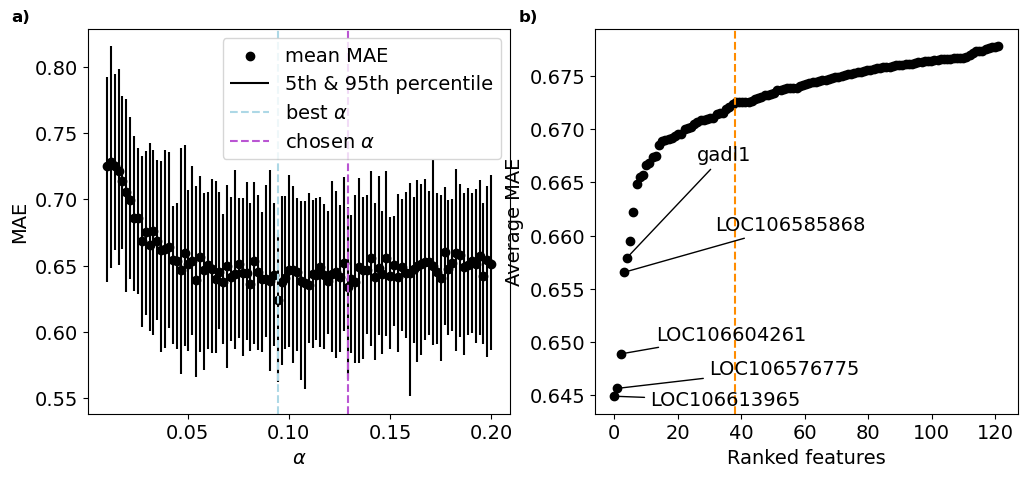

In [28]:
plt.rcParams.update({'font.size': 14})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

ax1.scatter(x=alpha_screen.alphas, 
            y= alpha_screen.mae_list,
            c='k',
            label="mean MAE")
ax1.vlines(alpha_screen.alphas, 
           error_low, 
           error_high,
           colors='k',
           label = "5th & 95th percentile")
ax1.axvline(x=best_alpha, color="lightblue", linestyle='--', label = r"best $\alpha$")
ax1.axvline(x=chosen_alpha, color="mediumorchid", linestyle='--', label = r"chosen $\alpha$")
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel("MAE")
ax1.legend(loc="upper right")

ax2.scatter(x, y, c='k')
ax2.annotate(feature_list[0], (x[0], y[0]), textcoords="offset points", xytext=(80,-7), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[1], (x[1], y[1]), textcoords="offset points", xytext=(120,10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[2], (x[2], y[2]), textcoords="offset points", xytext=(80,10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[3], (x[3], y[3]), textcoords="offset points", xytext=(120,30), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[4], (x[4], y[4]), textcoords="offset points", xytext=(70,70), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.axvline(x=idx_first_random, ls="--", c = "darkorange")

ax2.set_ylabel("Average MAE")
ax2.set_xlabel("Ranked features")

ax1.text(-0.18, 1.05, 'a)', transform=ax1.transAxes, fontsize=12, fontweight='bold', va='top')
ax2.text(-0.18, 1.05, 'b)', transform=ax2.transAxes, fontsize=12, fontweight='bold', va='top')
plt.savefig("../../figures/LGR_salmon_tapeworm.pdf")
plt.savefig("../../figures/LGR_salmon_tapeworm.png")

In [18]:
# Top genes
top20genes = list(mae_df.head(20)["Gene"])
top20genes

['LOC106613965',
 'LOC106576775',
 'LOC106604261',
 'LOC106585868',
 'gadl1',
 'LOC106563252',
 'LOC106592935',
 'LOC106570128',
 'rpl9',
 'LOC106570190',
 'ret2',
 'LOC106589565',
 'LOC106580503',
 'LOC106602581',
 'LOC106577505',
 'LOC106608989',
 'LOC123731547',
 'LOC106581127',
 'LOC106589096',
 'slc12a1']

In [19]:
['LOC106566372',
 'hba',
 'LOC106607380',
 'duox',
 'LOC106583594',
 'LOC106601072',
 'pgfrl',
 'LOC106601071',
 'LOC106578021',
 'LOC123724067']

['LOC106566372',
 'hba',
 'LOC106607380',
 'duox',
 'LOC106583594',
 'LOC106601072',
 'pgfrl',
 'LOC106601071',
 'LOC106578021',
 'LOC123724067']

In [20]:
contains_hemoglobin = salmon_GO.dropna()
contains_hemoglobin = contains_hemoglobin[contains_hemoglobin["GENENAME"].str.contains("hemoglobin")]
contains_hemoglobin.shape

(100, 6)

In [21]:
# Calc for the probability of encountering hemoglobin genes 5 times
all_gene_names = list(salmon_GO["GENENAME"].unique())
len(all_gene_names)

32357

In [22]:
hemoglobin_count_list = []
for iteration in range(10000):
    random20 = random.sample(all_gene_names, 20)
    hemoglobin_count = 0
    for gene in random20:
        if "hemoglobin" in str(gene):
            hemoglobin_count += 1
    hemoglobin_count_list.append(hemoglobin_count)

In [23]:
max(hemoglobin_count_list)

1

Text(0.5, 0, 'Number of hemoglobin genes')

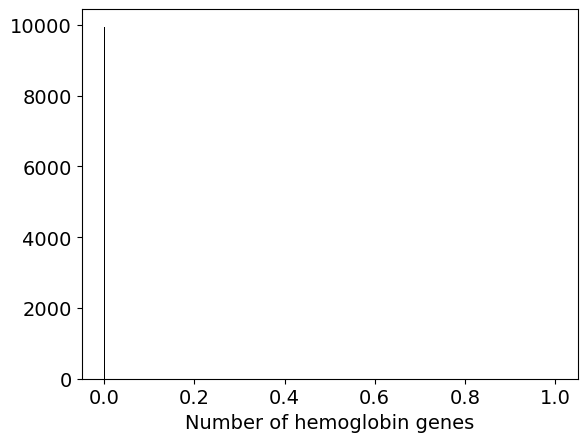

In [24]:
plt.hist(hemoglobin_count_list, bins=1000, color='k')
plt.xlabel("Number of hemoglobin genes")

In [25]:
random20

['uncharacterized LOC106571535',
 'ceramide synthase 1-like',
 'protein FAM204A',
 'LHFPL tetraspan subfamily member 3 protein',
 'regulator of cell cycle',
 'lysine-specific demethylase 2B-like',
 'cyclin-dependent kinase 7',
 'furin',
 'basal cell adhesion molecule',
 'NEDD8 ubiquitin like modifier',
 'spermatogenesis associated 6-like',
 'alpha-2Db adrenergic receptor',
 'vacuolar protein sorting-associated protein 29',
 'uncharacterized LOC123724416',
 'OTU deubiquitinase 7A',
 'uncharacterized LOC106576339',
 'general transcription factor IIIC, polypeptide 3',
 'Rho GTPase activating protein 24',
 'probable cytosolic iron-sulfur protein assembly protein ciao1-B',
 'MAM domain-containing glycosylphosphatidylinositol anchor protein 1']

In [26]:
transcriptome_XY = pd.read_csv("../../data/transcriptome_XY.csv", index_col=0)
transcriptome_XY

FileNotFoundError: [Errno 2] No such file or directory: '../../data/transcriptome_XY.csv'

In [ ]:
hemoglobin_genes = ["hba", "LOC106607380", "LOC106601072", "LOC106601071", "LOC123724067"]
hemoglobin_genes_df = transcriptome_XY[hemoglobin_genes]
hemoglobin_genes_df

,hba,LOC106607380,LOC106601072,LOC106601071,LOC123724067
F001,7.841489,6.684127,9.049141,6.934034,7.471161
F002,8.049102,7.776955,8.876601,7.313821,7.894540
F003,9.321372,9.142760,10.515895,8.078872,9.749636
F004,9.442323,7.953808,10.629716,9.164211,7.985053
F005,9.187983,8.223300,10.425331,8.316614,7.714572
...,...,...,...,...,...
F450,9.183097,8.909547,10.836300,8.788188,9.540840
F456,10.432081,9.924495,11.906412,9.321568,9.459813
F458,8.419208,8.547975,9.500379,6.595032,6.923386
F459,6.873686,5.033837,6.992821,7.403194,5.033837


In [ ]:
hemoglobin_genes_df.corr()

,hba,LOC106607380,LOC106601072,LOC106601071,LOC123724067
hba,1.000000,0.900110,0.946565,0.907537,0.764438
LOC106607380,0.900110,1.000000,0.901939,0.787359,0.839774
LOC106601072,0.946565,0.901939,1.000000,0.914895,0.765783
LOC106601071,0.907537,0.787359,0.914895,1.000000,0.600831
LOC123724067,0.764438,0.839774,0.765783,0.600831,1.000000


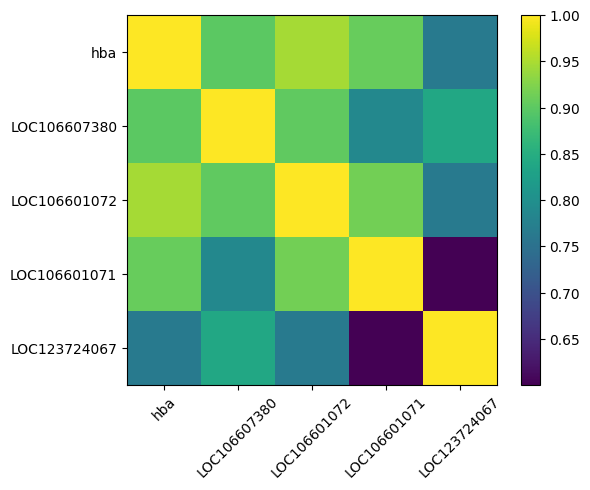

In [ ]:
plt.imshow(hemoglobin_genes_df.corr())
plt.xticks(np.arange(len(hemoglobin_genes)), hemoglobin_genes, rotation=45)
plt.yticks(np.arange(len(hemoglobin_genes)), hemoglobin_genes)
plt.colorbar()

In [ ]:
for hgene_a in hemoglobin_genes:
    for hgene_b in hemoglobin_genes:
        if hgene_a != hgene_b:
            rho, p_value = spearmanr(x, y)
            print(hgene_a, hgene_b, p_value)

hba LOC106607380 0.0
hba LOC106601072 0.0
hba LOC106601071 0.0
hba LOC123724067 0.0
LOC106607380 hba 0.0
LOC106607380 LOC106601072 0.0
LOC106607380 LOC106601071 0.0
LOC106607380 LOC123724067 0.0
LOC106601072 hba 0.0
LOC106601072 LOC106607380 0.0
LOC106601072 LOC106601071 0.0
LOC106601072 LOC123724067 0.0
LOC106601071 hba 0.0
LOC106601071 LOC106607380 0.0
LOC106601071 LOC106601072 0.0
LOC106601071 LOC123724067 0.0
LOC123724067 hba 0.0
LOC123724067 LOC106607380 0.0
LOC123724067 LOC106601072 0.0
LOC123724067 LOC106601071 0.0
